<a href="https://colab.research.google.com/github/kermanimohammad/Project6220_Advanced-Statistical-Approahes-to-Quality/blob/main/Week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.stats import mode , iqr, t, probplot, ttest_1samp
import statistics
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt
#use seaborn plotting style defaults
import seaborn as sns; sns.set()
import pandas as pd
!python --version

Python 3.10.12


# **Descriptive Statistics**

In [ ]:
X = np.array([10,2,6,11,12,7,9,8,11,3,4,5])

In [ ]:
R = np.ptp(X)
Xbar = np.mean(X)
Q2 = np.median(X)
M = mode(X)
print('R={0:.2f}, Xbar={1:.2f},Q2={2:.2f},Mode={3:}'.format(R,Xbar,Q2,M[0]))


R=10.00, Xbar=7.33,Q2=7.50,Mode=11


In [ ]:
#Quartile range
Q1 = np.percentile(X,25)
Q3 = np.percentile(X,75)
IQR = iqr(X)
print('Q1 = {0:.2f},Q3 = {1:.2f}, IQR = {2:.2f}'.format(Q1,Q3,IQR))

Q1 = 4.75,Q3 = 10.25, IQR = 5.50


<Axes: ylabel='X'>

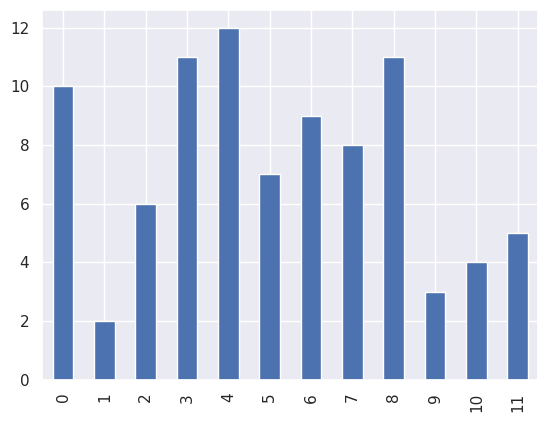

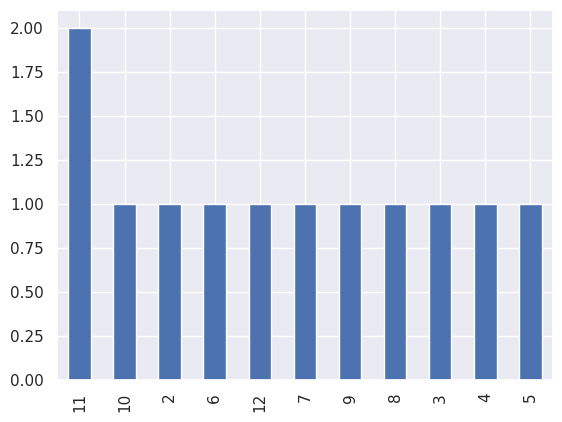

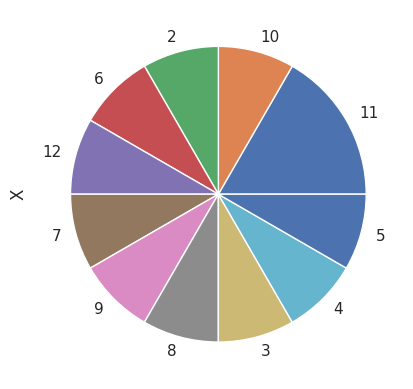

In [ ]:
df = pd.DataFrame(X,columns=['X'])
df['X'].value_counts()
df['X'].plot.bar()
plt.figure()
df['X'].value_counts().plot.bar()
plt.figure()
df['X'].value_counts().plot.pie()

In [ ]:
def StemLeafPlot(d):
  #A stem-and-leaf plot
  l,t = np.sort(d),10
  O= range(l[0]-l[0]%t,l[-1]+11,t)
  I = np.searchsorted(l,O)
  for e,a,f in zip(I,I[1:],O):
    print('%3d|'%(f/t),*(l[e:a]-f),sep='')
StemLeafPlot(X)

  0|23456789
  1|0112


Text(0, 0.5, 'Defects')

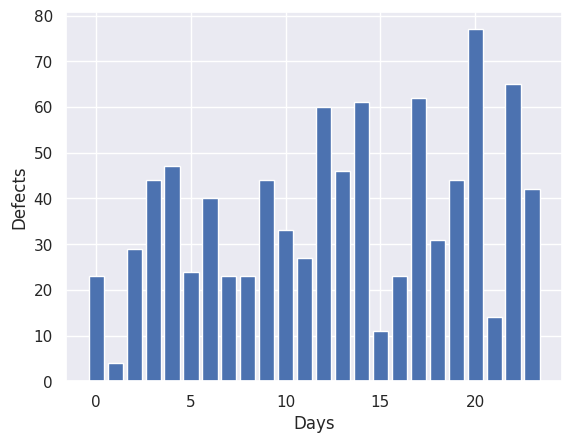

In [ ]:
X = np.array([23,4,29,44,47,24,40,23,23,44,33,27,60,46,61,11,23,62,31,44,77,14,65,42])
plt.bar(np.arange(len(X)), X)
plt.xlabel('Days')
plt.ylabel('Defects')

<Axes: >

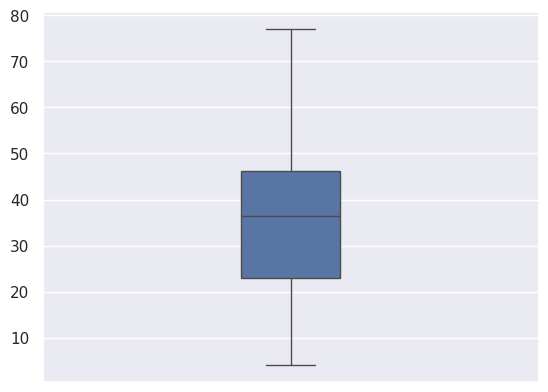

In [ ]:
sns.boxplot(data=X , orient = "v", width = .2 )


Text(0, 0.5, 'Relative frequency')

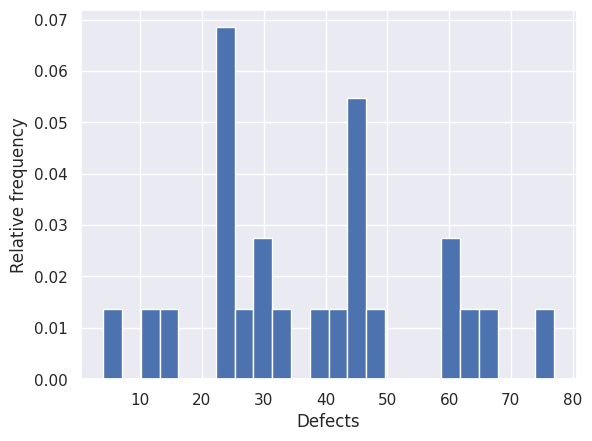

In [94]:
plt.hist(X, bins=len(X), density=True)
plt.xlabel('Defects')
plt.ylabel('Relative frequency')

<Axes: >

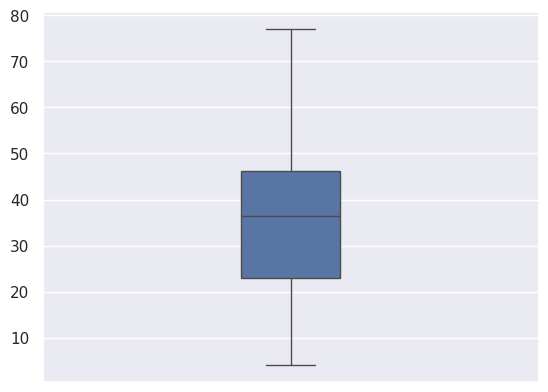

In [96]:
sns.boxplot(data=X, orient="v", width=.2)

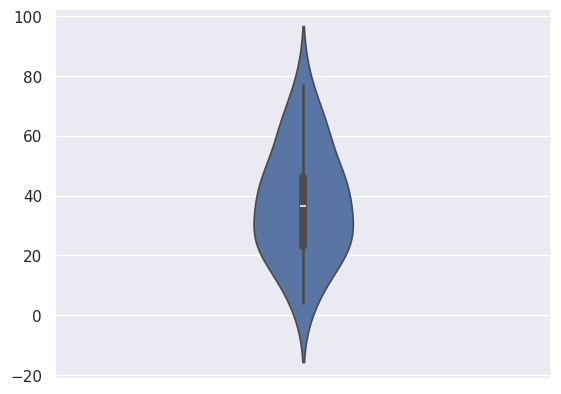

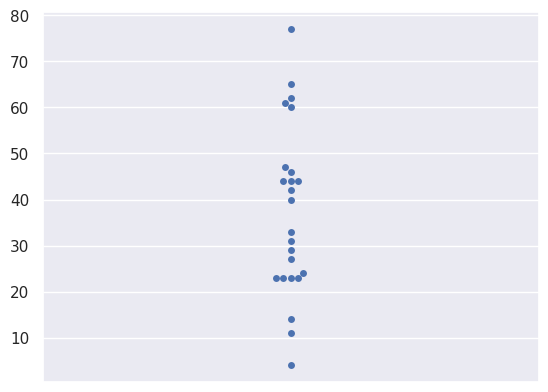

In [99]:
ax = sns.violinplot(data=X, width=.2)
plt.figure()
ax = sns.swarmplot(data=X, edgecolor="auto")

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([ 4, 11, 14, 23, 23, 23, 23, 24, 27, 29, 31, 33, 40, 42, 44, 44, 44,
         46, 47, 60, 61, 62, 65, 77])),
 (19.16451127433585, 37.375, 0.985805249733491))

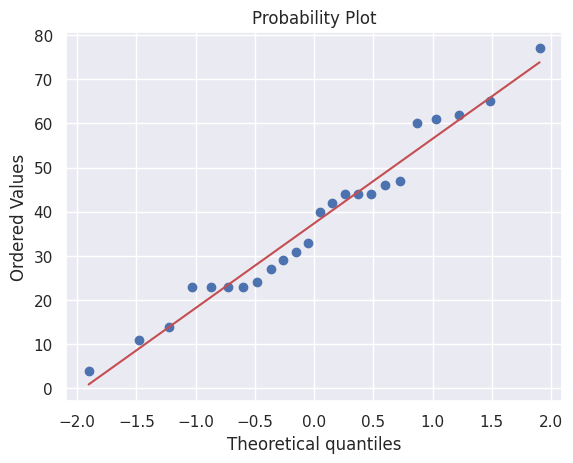

In [100]:
probplot(X, plot=plt)

<ipython-input-102-7dc47615963b>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights_long.pivot("month", "year", "passengers")


<Axes: xlabel='year', ylabel='month'>

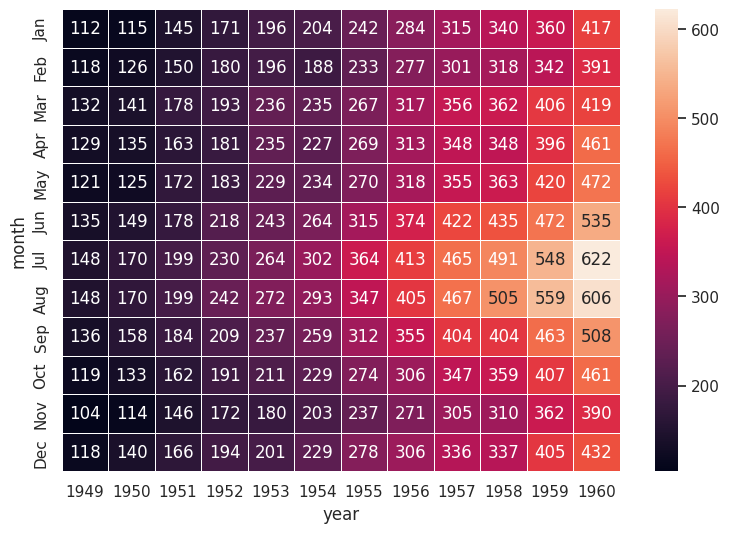

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

<ipython-input-104-f9979d72b955>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, binom.pmf(x, n, p), use_line_collection=True)


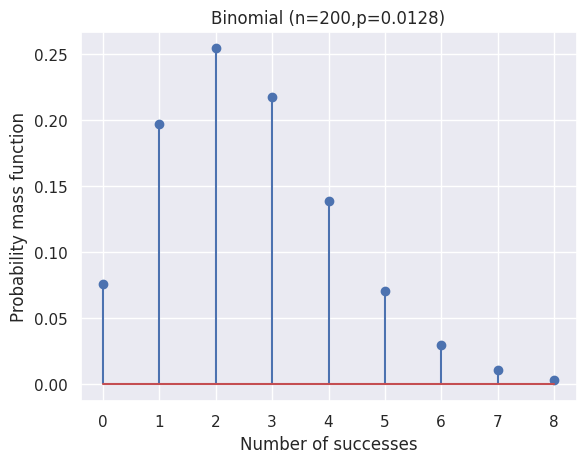

In [104]:
#Binomial parameters n and p
n, p = 200, 0.0128
# x = np.arange(0, n) # entire range not practical
# Instead chose range within some probability threshold
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
plt.figure()
plt.stem(x, binom.pmf(x, n, p), use_line_collection=True)
plt.title('Binomial (n={0},p={1})'.format(n, p))
plt.xlabel('Number of successes')
plt.ylabel('Probability mass function')
plt.show()

<ipython-input-106-9f36c4d9ec17>:4: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, poisson.pmf(x, lamda), use_line_collection=True)


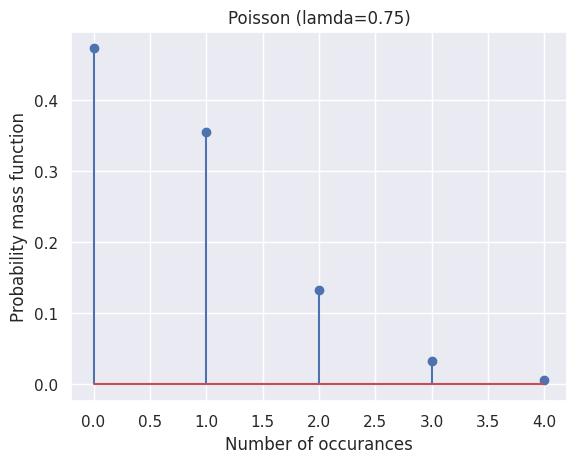

In [106]:
lamda = 0.75
x = np.arange(poisson.ppf(0.01, lamda), poisson.ppf(0.999, lamda))
plt.figure()
plt.stem(x, poisson.pmf(x, lamda), use_line_collection=True)
plt.title('Poisson (lamda={0})'.format(lamda))
plt.xlabel('Number of occurances')
plt.ylabel('Probability mass function')
#plt.autoscale(enable=True, axis='y', tight=True)
plt.show()


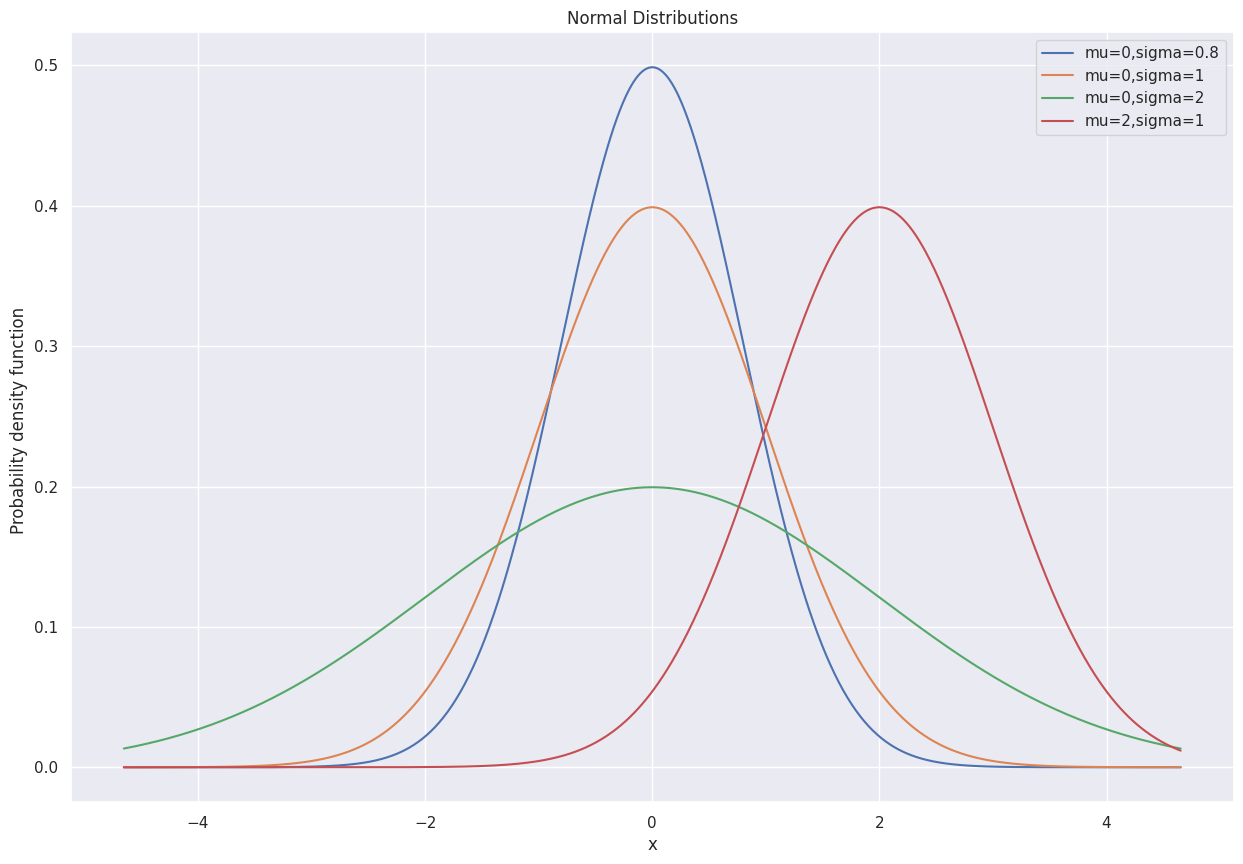

In [108]:
mu_sigmas = [(0, 0.8), (0, 1), (0, 2), (2, 1)]
x = np.linspace(norm.ppf(0.01, 0, 2), norm.ppf(0.99, 0, 2), 1000)
plt.figure(figsize=(15,10))

for mu, sigma in mu_sigmas:
    plt.plot(x, norm.pdf(x, mu, sigma), label=('mu={0},sigma={1}'.format(mu, sigma)))
    plt.title('Normal Distributions')
    plt.xlabel('x')
    plt.ylabel('Probability density function ')
plt.legend()
#plt.autoscale(enable=True, axis='both', tight=True)

plt.show()

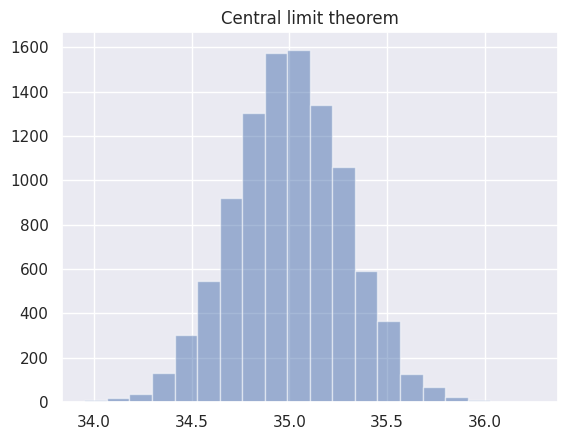

In [109]:
N = 10000
sim = np.zeros(N)
for i in range(N):
    sim[i] = np.mean(np.random.uniform(30, 40, 100))
plt.figure()
plt.hist(sim, bins=20, alpha=0.5)
plt.title('Central limit theorem')
plt.show()

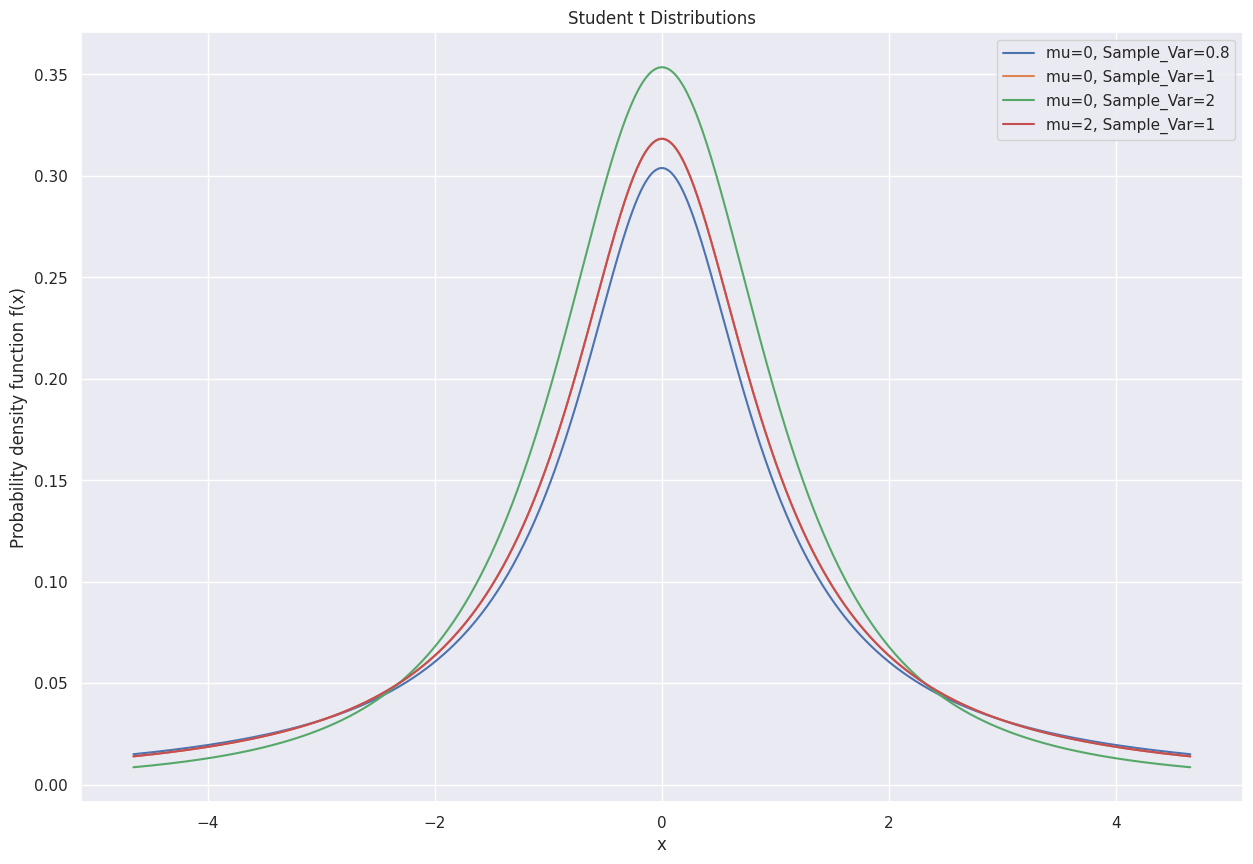

In [111]:
mu_variance = [(0, 0.8), (0, 1), (0, 2), (2, 1)]
x = np.linspace(norm.ppf(0.01, 0, 2), norm.ppf(0.99, 0, 2), 1000)
plt.figure(figsize=(15,10))

for mu, sigma in mu_variance:
    plt.plot(x, t.pdf(x, sigma),
             label=('mu={0}, Sample_Var={1}'.format(mu, sigma)))
    plt.title('Student t Distributions')
    plt.xlabel('x')
    plt.ylabel('Probability density function f(x)')
plt.legend()
#plt.autoscale(enable=True, axis='both', tight=True)

plt.show()